# Blackwell Project: Understanding Customers: Task 2

Background
* VP of sales (Goodrich) believes:
    * Customers who shop in-store are older
    * Older customers spend more
* Considering marketing activities and changes to website to attract older customers.
* Wants to better understand age of customers, and if age correlates with how much they spend. 

Danielle's Questions:
1. Are their differences in customer age between regions?
2. Can we predict the age of a customer in a region based on demographic data?
3. Is there any correlation between the customer's age and whether their transaction was online or in-store?
4. Do any other factors predict whether customers will buy online or in-store?

In [1]:
#DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#helpers
%matplotlib inline

In [2]:
#import data
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


## Pre-processing the data (again)

In [3]:
#look for duplicate observations/cases
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
79995    False
79996    False
79997    False
79998    False
79999    False
Length: 80000, dtype: bool

In [4]:
#drop duplicate observations from the dataset
data = data.drop_duplicates()

In [5]:
#look at number of entries to see how many duplicates we dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


*Notes*

* i was hoping to get information on any duplicate entries in the data frame before i drop duplicates in the next step. need to find another command.
* figure out how to output and save a processed version of the data file

##### Data Normalization
* experiments have shown that ML and deep learning models perform "way better" on data that is normally distributed
* the goal of normalization is to transform the values in the dataset so they ***all have a common scale*** without distorting differences between the range of values
* there are several ways to normalize data. in this example, i'll use the standard scaler model. 
* see [easy guide to data preprocessing in python](https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html)

---

## Decision Tree classification model

In [6]:
#specify the independent variables (features/attributes) for the model 
X = data.iloc[:, 0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [7]:
#specify the dependent variable (target) for the model
y = data['region']

In [8]:
#split datasets into a training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30,
                                                   random_state = 123)

*Notes*  
* ```test_size = .30``` parameter is specifying that 70% of the dataset should be for training the model, and 30% should be for testing the model
* ```random_state = 123``` ensures that the same observations will be selected for the training and test sets each time the cell is run/re-run. the number 123 does not mean anything, you could use any other number in its place

In [9]:
#instatiate the decision tree algorithm 
algo = DecisionTreeClassifier(max_depth=3)

#train the model on the training data set
model = algo.fit(X_train, y_train)

In [10]:
#test the model on testing data to see how good the predictions are
preds = model.predict(X_test)

In [11]:
#create classification report on how well model did on the testing data
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.68      0.51      4838
           2       0.90      1.00      0.95      5979
           3       0.54      0.11      0.18      5391
           4       0.65      0.70      0.67      7786

    accuracy                           0.64     23994
   macro avg       0.63      0.62      0.58     23994
weighted avg       0.64      0.64      0.60     23994



In [12]:
#create confusion matrix showing model predictions for each class
print(metrics.confusion_matrix(y_test, preds))

[[3266    0  494 1078]
 [   0 5979    0    0]
 [2753  226  579 1833]
 [1960  411    0 5415]]


*Notes*
* in this example our goal is to use ML to train the decision tree classifier model to predict the region of each purchase based on the other four features in the dataset.
* ```X_train, x_test, y_train, y_test = train_test_split...``` split the data into a training set (```X_train, y_train```)—which the model trains on—and a testing set—which we will test the model on to see how well it does in predicting which 'region' each transaction is from.
* ```preds = model.predict(X_test)```is where we are giving our trained model some new sets of X values (```X_test```) and asking it predict what region each is from.
* in ```print(classification_report(y_test, preds))``` we are comparing the prediction the model made for each observation in X_test, comparing the predicted region to the actual region for each observation (i.e. the values in ```y_test```), and generating a classification report
* understanding the classification report: precison = the true positives/true positives + false positives; recall = true positives/true positives + false negatives' f1-score = a balance between precision and recall; support = the number of observations in X_test that were in each region. 
* accuracy = number of correct predictions/ total number of predictions
    * accuracy is only meaningful if x_test is roughly balanced between the classes. just suppose 98% of the observations were in region 1, then the model could get 98% accuracy just by predicting that all observations are from region 1.
* the confusion matrix is telling us for the observations actually from each region (rows), how many the model predicted in each region (e.g. for the cases actually in region 1, the model predicted 3,266 were in 1, 0 were in 2, 494 were in 3, and 1078 were in 4)

---

##### visually plot the decision tree model

In [13]:
from sklearn.tree import plot_tree #this should be at top with other imports

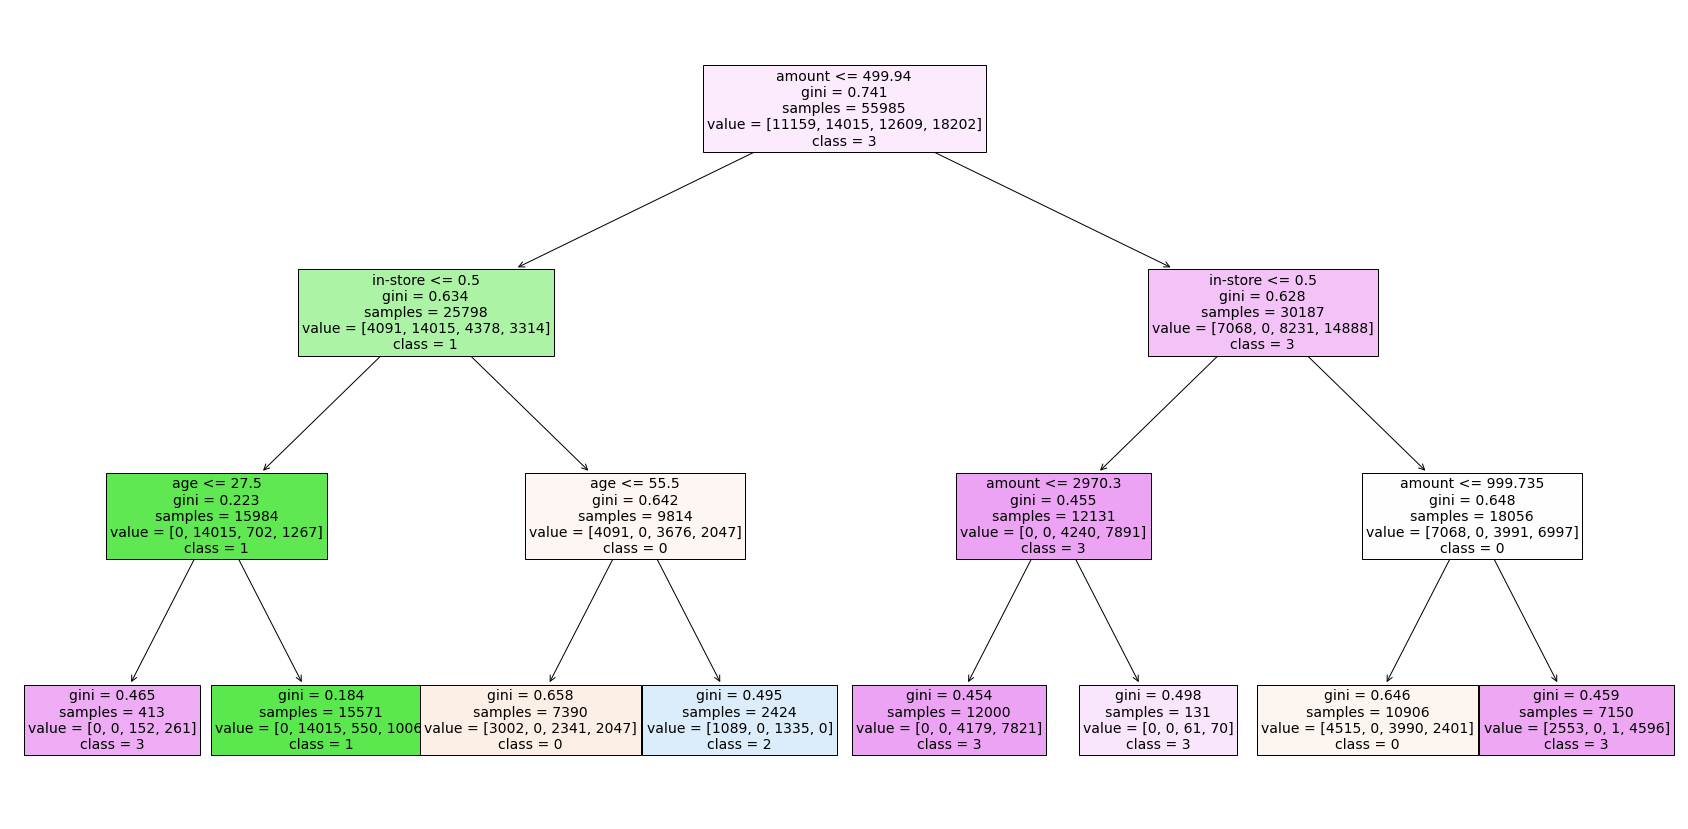

In [14]:
#plot the decision tree 
fig = plt.figure(figsize=(30,15))
tree = plot_tree(model, max_depth=3, feature_names=X.columns, 
                 class_names =['0','1', '2','3'],
                 filled = True, fontsize=14)

---

In [15]:
#graphviz creates better visualizations of decision trees
import graphviz

In [16]:
#sklearn pkg also needed to plot tree using graphviz
from sklearn import tree

In [17]:
#print a text-only representation of the decison tree model
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 499.94
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 27.50
|   |   |   |--- class: 4
|   |   |--- feature_1 >  27.50
|   |   |   |--- class: 2
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 55.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  55.50
|   |   |   |--- class: 3
|--- feature_3 >  499.94
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 2970.30
|   |   |   |--- class: 4
|   |   |--- feature_3 >  2970.30
|   |   |   |--- class: 4
|   |--- feature_0 >  0.50
|   |   |--- feature_3 <= 999.74
|   |   |   |--- class: 1
|   |   |--- feature_3 >  999.74
|   |   |   |--- class: 4



In [18]:
import pydotplus

In [19]:
#change y values into strings because graphviz requires dv to be strings
y_str=y.astype(str)

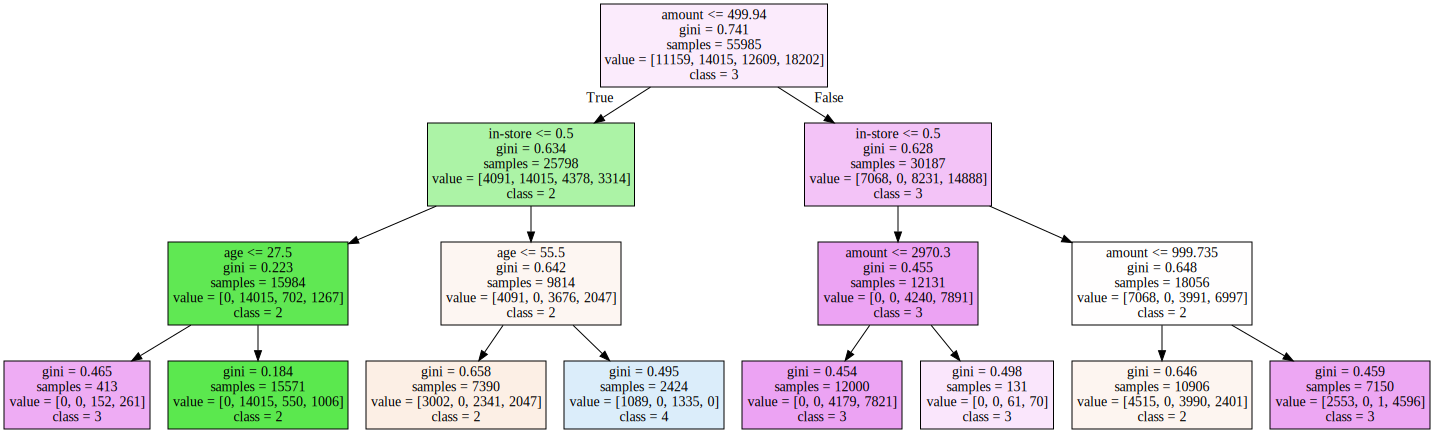

In [20]:
#apply the graphviz tree plotting function to my model and data
dot_data = tree.export_graphviz(model, max_depth=3,  
                                feature_names=X.columns,  
                                class_names=y_str,
                                filled=True)
# Draw graph
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"8,8!"')
#pydot_graph.write_png('resized_tree.png')

graph = graphviz.Source(dot_data, format="png") 
graph 

In [21]:
#output a .png file of graphviz tree & save to directory with jup nb
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

*Notes*
* investigate In(19). i'm not sure what pydot_graph and graph lines are doing or if i need them.
* ```tree = plot_tree(model, max_depth=3, feature_names=X.columns, 
                 class_names =['0','1', '2','3'], filled = True, fontsize=14)``` displays a visual plot of the model. 
* because that version of the tree was a bit crowded after i increased the fontsize of the nodes/leaves, i plotted the tree using the graphviz pkg. 
* the nodes of the tree tells us what feature-value the model splits the data at during each iteration (e.g. it first splits the data using the amount <= to 499.95, the child nodes then tell us the data was split using the in-store <=0.5, and so on).
* each node/leaf also tells us the gini co-efficient of that node. can't remember what that means, but i know lower is better. if a partition has all and only observations within a single region (in this example), the gini will be 0.
* samples = tells us how many observations from the data set are in that partition, so as we move down a branch from top to bottom the sample = number should be getting smaller and smaller as the model partitions the data into smaller and smaller sections.
* the value = line tells us how many observations are in each partition at that node/leaf. (e.g. in the age<= 55.5 node we find out that there are 4091 obs. in region 1, 0 in region 2, 3676 in region 3, and 2047 in region 4).
* class = is telling us the what region the model is predicting (at that point in the tree) for all the observations in that partition...i'm not sure this make sense, review later.  
* decision trees can also be plotted using the dtreeviz pkg—these are the best looking. for more info see [this github post](https://github.com/parrt/dtreeviz)  
¿ can/how do you recover the accuracy score for the model from the plot of the decision tree? 

---

### Experiment with Model Parameters

#### gini → entropy

In [22]:
#changing default gini criterion to entropy
algo_ent = DecisionTreeClassifier(criterion='entropy', max_depth=3)

#train the decision tree algorithm on the training data
model_ent = algo_ent.fit(X_train, y_train)

In [23]:
#run model on X_test and predict values in y_test 
preds_ent = model_ent.predict(X_test)

In [24]:
#check model's predicted values against actual values (ground truth) in y_test 
#and report the results
print(classification_report(y_test, preds_ent))

              precision    recall  f1-score   support

           1       0.40      0.56      0.47      4838
           2       0.90      1.00      0.95      5979
           3       0.54      0.22      0.31      5391
           4       0.65      0.70      0.67      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.64      0.64      0.62     23994



*Notes*
* gini is the default for the model and is a measure of impurity
* entropy is a measure of information gain
* both gini and entropy are measures of information gain

---

#### max_depth 3 → 4

In [25]:
#change max depth from 3 to 4
algo_ent4 = DecisionTreeClassifier(criterion='entropy', max_depth=4)

#train the decision tree algorithm on the training data
model_ent4 = algo_ent4.fit(X_train, y_train)

In [26]:
#run model on X_test and predict values in y_test 
preds_ent4 = model_ent4.predict(X_test)

In [27]:
#check model's predicted values against actual values (ground truth) in y_test 
#and report the results
print(classification_report(y_test, preds_ent4))

              precision    recall  f1-score   support

           1       0.40      0.53      0.46      4838
           2       0.90      1.00      0.95      5979
           3       0.53      0.23      0.32      5391
           4       0.65      0.72      0.68      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.64      0.64      0.62     23994



*Notes*  
* these scores are identical to scores for max depth 3 model. not sure if that's b/c i did something wrong or the model doesn't gain any predictive power after depth 3
    * ben said it's b/c the model doesn't improve beyond max depth 3
    
---

##### max depth 4 → 1 

In [28]:
#change max depth from 4 to 1
algo_ent1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)

#train the decision tree algorithm on the training data
model_ent1 = algo_ent1.fit(X_train, y_train)

In [29]:
#run model on X_test and predict values in y_test 
preds_ent1 = model_ent1.predict(X_test)

In [30]:
#check model's predicted values against actual values (ground truth)
#in y_test and report the results
print(classification_report(y_test, preds_ent1))

              precision    recall  f1-score   support

           1       0.40      1.00      0.57      4838
           2       0.50      1.00      0.67      5979
           3       0.00      0.00      0.00      5391
           4       0.00      0.00      0.00      7786

    accuracy                           0.45     23994
   macro avg       0.23      0.50      0.31     23994
weighted avg       0.21      0.45      0.28     23994



C:\Users\kpiat\anaconda3\envs\course1-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Notes*
* i think this warning appeared because there were no observations in regions 3 & 4 after the split represented in the root node of the tree. but with max depth of the tree set to 1, there are no more splits in the data (***verify***)  
---

# cross validation

how does cross validation decrease the chance that a ML model will be overfit?
* basically because you are testing and training the model on several smaller datasets (the folds), and then averaging the results of each of those to come up with the final model, it's more likely the overfitting will be smoothed out in the average. say the first model is overfit by .6, ***I DON'T THINK THIS IS CORRECT. I'VE DONE A LOT OF RESEARCH AND CANNOT FIND A SATISFACTORY ANSWER***

###### 3-fold model

In [31]:
#instatiate cross validation model with decision tree algorithm
cv_model = DecisionTreeClassifier(random_state=123)

#apply model with 3 fold to dataset
scores = cross_val_score(cv_model, X, y, cv = 3)
print(scores)

[0.56372843 0.56282821 0.56078623]


In [32]:
#calculate mean of accuracy scores from each fold
avg_score = np.mean(scores)
print(avg_score)

0.5624476217332588


###### 4-fold model

In [33]:
#apply 4-fold-model to data
scores = cross_val_score(cv_model, X, y, cv =4)
print(scores)

[0.56464116 0.56934234 0.56174044 0.56021807]


In [34]:
#calculate mean of accuracy scores from each fold
avg_score = np.mean(scores)
print(avg_score)

0.5639854991005929


###### 8-fold model

In [35]:
#apply 8-fold model to data
scores = cross_val_score(cv_model, X, y, cv = 8)
print(scores)

[0.5665133  0.56131226 0.56471294 0.56997099 0.5616685  0.56346904
 0.56036811 0.56376913]


In [36]:
#calculate mean of accuracy scores from each fold
avg_score = np.mean(scores)
print(avg_score)

0.5639730351792075


###### 20-fold model

In [37]:
#apply 20 fold model to data
scores = cross_val_score(cv_model, X, y, cv = 20)
print(scores)

[0.57189297 0.56764191 0.55938985 0.55513878 0.55188797 0.5643911
 0.55313828 0.56814204 0.5603901  0.56764191 0.56539135 0.55613903
 0.57264316 0.5643911  0.56189047 0.55313828 0.55513878 0.5423856
 0.55763941 0.55227614]


In [38]:
#calculate mean of accuracy scores from each fold
avg_score = np.mean(scores)
print(avg_score)

0.5600344120547396


*Notes*  
* i'm not sure how to choose the optimal number of folds. 
* i expected the accuracy of the model to improve at least slightly (up to a point) the more folds you used in the cv model because i was mistakenly thinking that in a cv model, the model was adjusted after being trained on each fold, so that after training the final model was basically the average of the models trained on each fold. 
* however, after talking to david i now know that is not how it works. 
* when you specify the type of algorithm (e.g. decision tree, random forest), set the various parameters, and specify your feature and target variables—the model is set. the model is not changed/refined in the training on each fold. the same model is used on every fold
* but then how does cross validation cut the risk of overfitting? basically, the accuracy scores on each fold should be roughly the same. if one accuracy score is very different than the others, you know that something is going on with that part of the data and you need to investigate to figure it out. (***verify: i'm not sure about this***)

### try random forest and decision tree classifier models
* to select the best model for our task, we should create, train, and test many different models based on different algorithms (e.g. 1NN, 3NN, KR-1, Random Forest) and then choose the one which one performs the best. 

In [39]:
#instead of preparing each model seperately, we can create a list
#and do them all at once

#create an empty list
algos_class =[]

#add random rorest classifier algorithm to empty list
algos_class.append(('Random Forest Classifier', RandomForestClassifier()))
print(algos_class)

[('Random Forest Classifier', RandomForestClassifier())]


In [40]:
#add decision tree classifier algoritm to empty list
algos_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
print(algos_class)

[('Random Forest Classifier', RandomForestClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier())]


In [41]:
#create an empty list to hold the cross validation results for each model
results = []
names = []

for name, model in algos_class: 
    result = cross_val_score(model, X, y, cv=3, scoring = 'accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.5847409590497329
Decision Tree Classifier 0.5624976337673826


*Notes*  

☼ IndentationError fix: i repeatedly got an indentation error when running ```for name, model in algos_class:``` i think b/c i didn't have a empty line after the ```results.append(result)```  

☼ at first i could only get decision tree result to print, then realized i needed to embed second for loop within the first for loop. but now the random forest result is printing twice!

¿would you choose the random forest or decision tree model for the project? why?
* based on what i know now, i don't think i would choose either one because neither reaches the treshold of 75% accuracy. both models are little better than chance at predicting the region of a transaction. 
* i have since read that data scientists use occam's razor. so if two models have the same predictive power, you should always choose the simpiler one. 

---
# more Experimentation
* make changes to the data, train the models on the altered data, and compare and contrast the results
* ideally, your model should have > 75% accuracy

#### discretize age and use it as DV, experiment with different numbers of bins

*feature_engine discretizer
* ```EqualWidthDiscretiser```
* pkg depends on sklearn KBinsDiscretizer

*sklearn discretizer functions*
* the equal width bins discretizer: ```discretizer_ew = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')``` 
* the equal frequency bins discretizer: ```discretizer_ef = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy='uniform')``` 

*pandas discretizer functions*
* ```cut()```
* ```qcut()```

*numpy discretizer functions*
* ```digitize```

In [42]:
#import pkgs needed to discretize variables
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisers import EqualWidthDiscretiser

*notes*  

☼ install fix: first try feature_engine would not install because pkg was not found. then david helped me install it from the conda forge repo. in a conda terminal with the relevant ve activated, type ```conda install -c conda-forge feature_engine```
* i asked about doing it with pip. he said avoid if possible b/c pip sometimes stores files in weird places and end up breaking later. so just install from conda repos if possible


###### Discretize age — 3 bins

In [43]:
#instantiate the feature_engine equal width discretizer function and give
#instructions on variable to discretize and how many bins to use
disc_fe = EqualWidthDiscretiser(bins=3, variables = ['age'])

In [44]:
#apply the discretizer function to the X data
disc_fe.fit(data)

EqualWidthDiscretiser(bins=3, variables=['age'])

In [45]:
#create a new dataframe that replaces age with the discretized version of age
X_disc_age = disc_fe.transform(data)

In [46]:
#look at first 5 rows of new dataframe to ensure the above process was successful
X_disc_age.head()

,in-store,age,items,amount,region
0,0,0,4,281.03,2
1,0,0,2,219.51,2
2,1,1,3,1525.70,4
3,1,1,3,715.25,3
4,1,0,4,1937.50,1


In [47]:
#create an empty list to hold the cross validation results for each model
results_disc_age = []
names_disc_age = []

for name, model in algos_class: 
    result = cross_val_score(model, X_disc_age, y, cv=3, scoring = 'accuracy')
    names_disc_age.append(name)
    results_disc_age.append(result)
    
for i in range(len(names)):
    print(names_disc_age[i], results_disc_age[i].mean())

Random Forest Classifier 1.0
Decision Tree Classifier 1.0


In [48]:
#instantiate the feature_engine equal width discretizer function and give instructions on which
#variable to discretize and how many bins to use
disc_fe50 = EqualWidthDiscretiser(bins=50, variables = ['age'])

In [49]:
#apply the discretizer function to the X data
disc_fe50.fit(X)

EqualWidthDiscretiser(bins=50, variables=['age'])

In [50]:
#create a new dataframe that replaces age with the discretized version of age
X_disc_age50 = disc_fe50.transform(X)

In [51]:
X_disc_age50.head()

,in-store,age,items,amount
0,0,14,4,281.03
1,0,12,2,219.51
2,1,20,3,1525.70
3,1,20,3,715.25
4,1,11,4,1937.50


In [52]:
cv_model = RandomForestClassifier()
print(cross_val_score(cv_model, X_disc_age50, y, cv=5))

[0.58445861 0.58170793 0.57964491 0.5803951  0.57405439]


---

#### discretize amount and use it as the dv. can a useful model be constructed?

Steps  
1. re-order data so 'amount' is on right end of df
2. specify features and target variables
3. discretize 'amount' variable  
    a. instantiate discretizer function  
    b. apply disc. function to 'amount' var  
    c. create new df with discretized amount var subbed in
4. instantiate the decision tree cv model
5. apply cv model to X and disc_y and print cross val score
6. interpret results

###### Step 1: reorder data

In [53]:
#re-order columns in df to put amount at the end
data = data[['in-store', 'age', 'items', 'region', 'amount']]
data.head()

,in-store,age,items,region,amount
0,0,37,4,2,281.03
1,0,35,2,2,219.51
2,1,45,3,4,1525.70
3,1,46,3,3,715.25
4,1,33,4,1,1937.50


###### step 2: specify features and target

In [54]:
#set features of the model
X = data.iloc[:, 0:4]
X.head()

,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [55]:
y = data['amount']
y.head()

0     281.03
1     219.51
2    1525.70
3     715.25
4    1937.50
Name: amount, dtype: float64

###### step 3: discretize amount variable

In [56]:
#instantiate discretizer function
disc = EqualWidthDiscretiser(bins=3, variables = ['amount'])

In [57]:
#apply discretizer function to y
disc.fit(y)

TypeError: The data set should be a pandas dataframe

---

#### use two additional classification algorithms from sci-kit learn

---

#### what about items? are these even in the tree? why or why not?

---

#### what about classifying where a transaction took place?
---

### feature (dependent variable)hhh importance

In [ ]:
# use pandas and random forest model to see which features within the df are most important 
feature_imp = pd.series(model.feature_importances_, index=data.feature.names)
    .sort_values(ascending=False)